In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import thinkstats2
import thinkplot

from IPython.core import page
page.page = print

In [2]:
df = pd.read_csv("data.csv",encoding = 'ISO-8859-1') 

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

In [5]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
invoice_num     541909 non-null object
stock_code      541909 non-null object
description     540455 non-null object
quantity        541909 non-null int64
invoice_date    541909 non-null object
unit_price      541909 non-null float64
cust_id         406829 non-null float64
country         541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [7]:
df.isnull().sum().sort_values(ascending=False)

cust_id         135080
description       1454
country              0
unit_price           0
invoice_date         0
quantity             0
stock_code           0
invoice_num          0
dtype: int64

In [8]:
df[df.isnull().any(axis=1)].head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [9]:
df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')

In [10]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
df_new = df.dropna()

In [12]:
df_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
invoice_num     406829 non-null object
stock_code      406829 non-null object
description     406829 non-null object
quantity        406829 non-null int64
invoice_date    406829 non-null datetime64[ns]
unit_price      406829 non-null float64
cust_id         406829 non-null float64
country         406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [14]:
df_new.describe().round(2)

,quantity,unit_price,cust_id
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


In [15]:
order_canceled = df['invoice_num'].apply(lambda x:int('C' in x))
n1 = order_canceled.sum()
n2 = df.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 9288/541909 (1.71%) 


# Remove Quantity with negative values



In [16]:
df_new = df_new[df_new.quantity > 0]

In [17]:
df_new.describe().round(2)

,quantity,unit_price,cust_id
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


## Add the column - amount_spent

In [18]:
df_new['amount_spent'] = df_new['quantity'] * df_new['unit_price']

In [19]:
# rearrange all the columns for easy reference
df_new = df_new[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']]

# Add the columns - Month, Day and Hour for the invoice

In [20]:
df_new.insert(loc=2, column='year_month', value=df_new['invoice_date'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=3, column='month', value=df_new.invoice_date.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=4, column='day', value=(df_new.invoice_date.dt.dayofweek)+1)
df_new.insert(loc=5, column='hour', value=df_new.invoice_date.dt.hour)

In [21]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


# Exploratory Data Analysis (EDA)

How many orders made by the customers?

In [22]:
df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count().head()

,cust_id,country,invoice_num
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


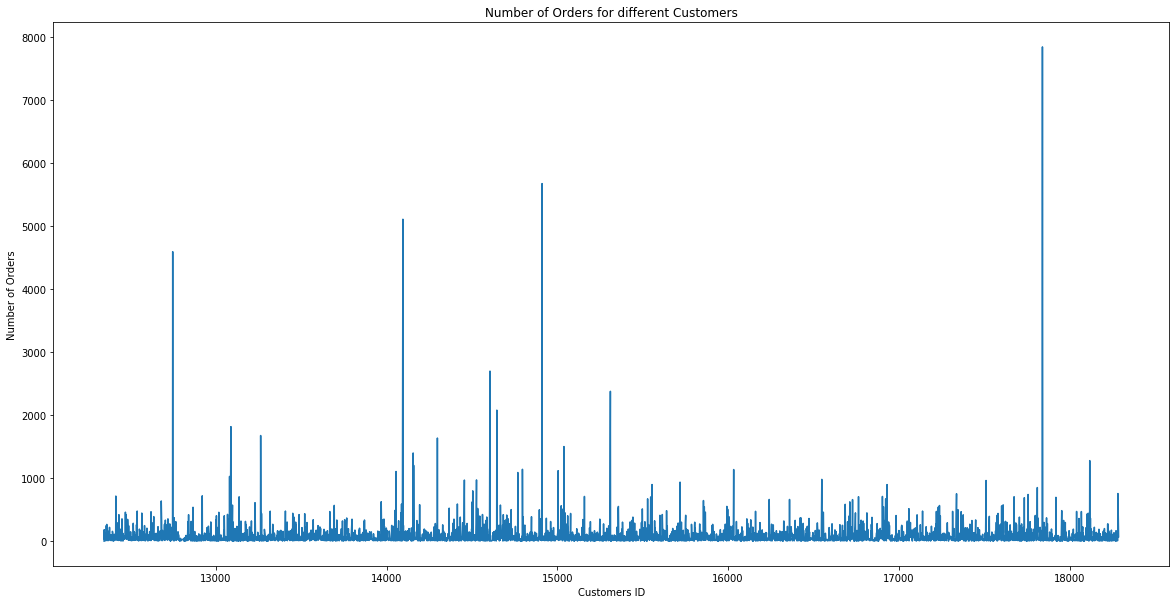

In [23]:
orders = df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()

plt.subplots(figsize=(20,10))
plt.plot(orders.cust_id, orders.invoice_num)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [24]:
orders.invoice_num.max()

7847

Check TOP 5 most number of orders

In [25]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='invoice_num', ascending=False).head()

The TOP 5 customers with most number of orders...


,cust_id,country,invoice_num
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700


How much money spent by the customers

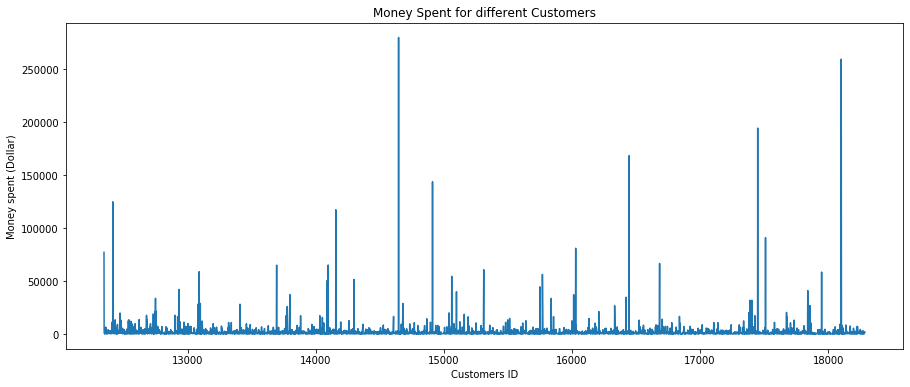

In [26]:
money_spent = df_new.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.cust_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [27]:
print('The TOP 5 customers with highest money spent...')
money_spent=money_spent.sort_values(by='amount_spent', ascending=False)
money_spent.head()

The TOP 5 customers with highest money spent...


,cust_id,country,amount_spent
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06


In [28]:
df1=df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index()
df1

[201012]    1400
[201101]     987
[201102]     998
[201103]    1321
[201104]    1149
[201105]    1555
[201106]    1393
[201107]    1331
[201108]    1281
[201109]    1756
[201110]    1929
[201111]    2658
[201112]     778
Name: year_month, dtype: int64

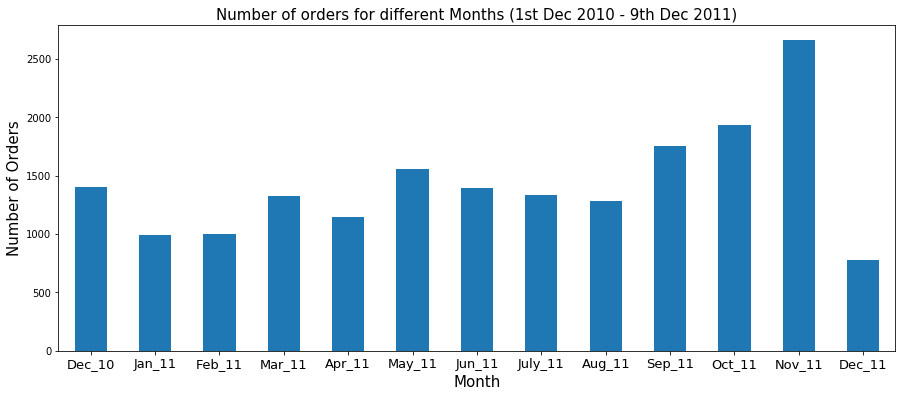

In [29]:
ax = df1.plot('bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

How many orders (per day)?

In [30]:
df2=df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index()
df2

[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: day, dtype: int64

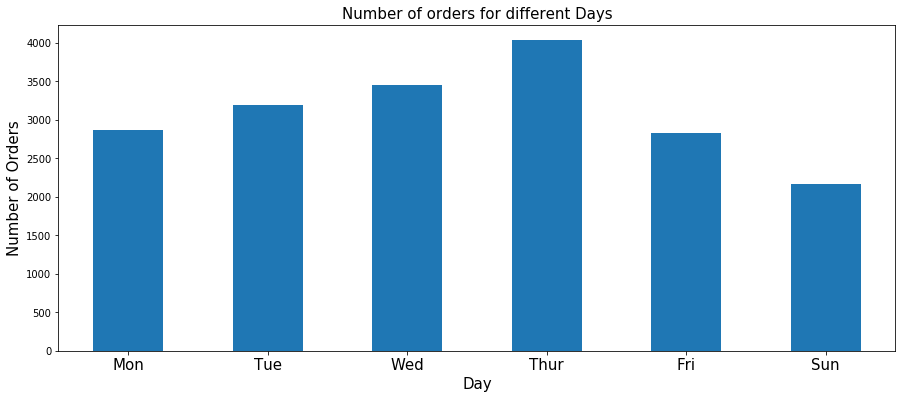

In [31]:
ax = df2.plot('bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

How many orders (per hour)?

In [32]:
df3=df_new.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index()
df3

[6]        1
[7]       29
[8]      555
[9]     1394
[10]    2226
[11]    2276
[12]    3129
[13]    2637
[14]    2275
[15]    2038
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: hour, dtype: int64

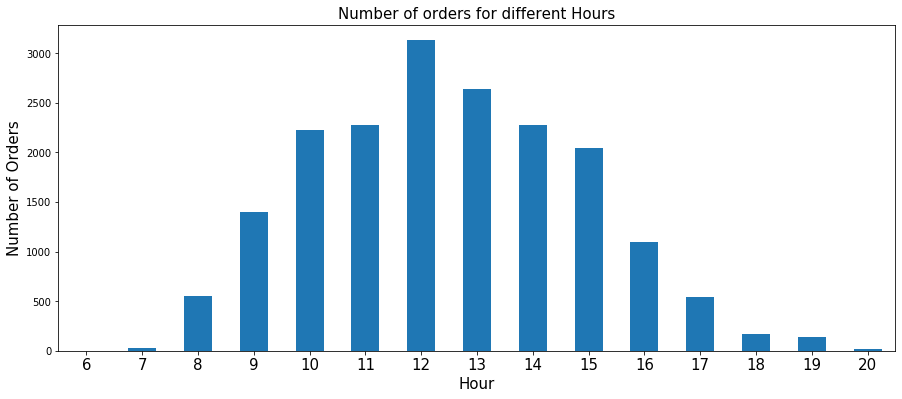

In [33]:
ax = df3.plot('bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

Discover patterns for Unit Price

In [34]:
df_new.unit_price.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

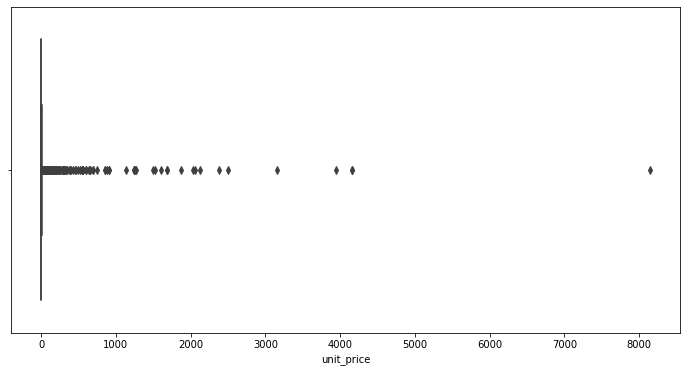

In [35]:
plt.subplots(figsize=(12,6))
sns.boxplot(df_new.unit_price)
plt.show()

In [36]:
df_free = df_new[df_new.unit_price == 0]

In [37]:
df_free.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
9302,537197,2010-12-05 14:02:00,201012,12,7,14,22841,ROUND CAKE TIN VINTAGE GREEN,1,0.0,0.0,12647.0,Germany
33576,539263,2010-12-16 14:36:00,201012,12,4,14,22580,ADVENT CALENDAR GINGHAM SACK,4,0.0,0.0,16560.0,United Kingdom
40089,539722,2010-12-21 13:45:00,201012,12,2,13,22423,REGENCY CAKESTAND 3 TIER,10,0.0,0.0,14911.0,EIRE
47068,540372,2011-01-06 16:41:00,201101,1,4,16,22090,PAPER BUNTING RETROSPOT,24,0.0,0.0,13081.0,United Kingdom
47070,540372,2011-01-06 16:41:00,201101,1,4,16,22553,PLASTERS IN TIN SKULLS,24,0.0,0.0,13081.0,United Kingdom


In [38]:
df4=df_free.year_month.value_counts().sort_index()
df4

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

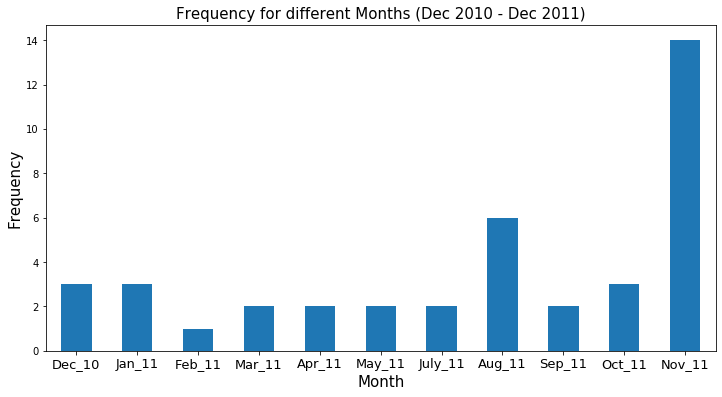

In [39]:
ax = df4.plot('bar',figsize=(12,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

How many orders for each country?


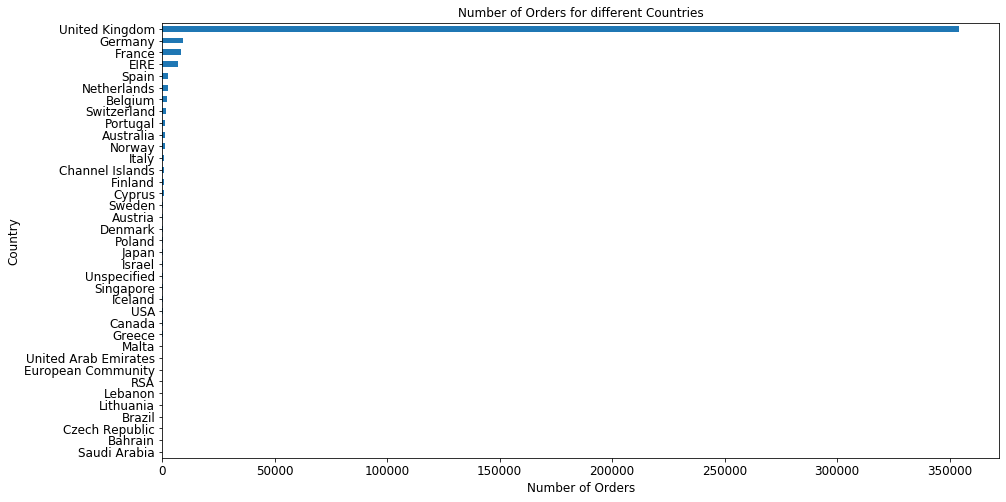

In [40]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()

plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

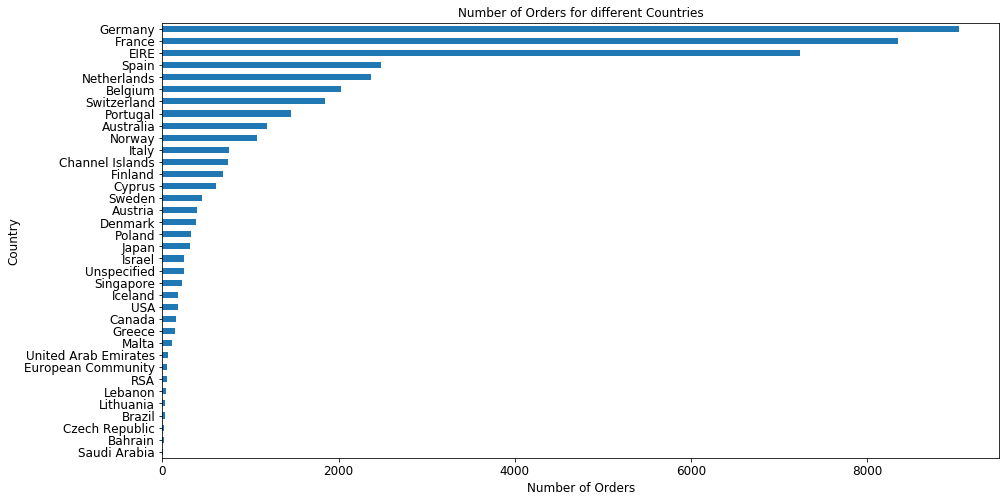

In [41]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
del group_country_orders['United Kingdom']


plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12, )
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()


How much money spent by each country?

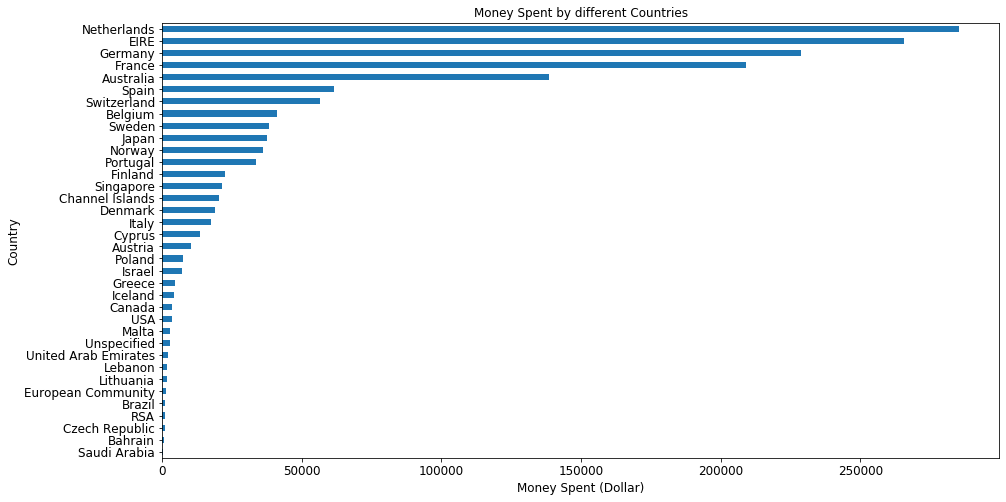

In [42]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']


plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

In [43]:
from sklearn.utils import resample

In [44]:
amount_spent=df_new[['amount_spent']]
amount_spent

,amount_spent
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34
5,15.30
6,25.50
7,11.10
8,11.10
9,54.08


In [45]:
means = []

i=0

#confidence interval shrinks with more samples
while i<1000:
    means.append(resample(amount_spent, replace=True, n_samples=len(amount_spent)).mean())
    i+=1

In [46]:
df_means = pd.DataFrame(means)

In [47]:
df_means

,amount_spent
0,22.772775
1,22.635625
2,22.192098
3,22.112872
4,22.023885
5,22.464877
6,22.434514
7,22.249126
8,21.896252
9,22.696934


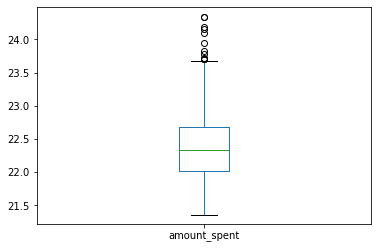

In [48]:
df_means.plot.box()

In [49]:
confidence_interval = df_means.quantile([0.05 - 0.025, 0.95 + 0.025])

In [50]:
confidence_interval

,amount_spent
0.025,21.615236
0.975,23.521207


In [51]:
lower_interval = confidence_interval.iloc[0,0]
upper_interval = confidence_interval.iloc[1,0]

print(lower_interval, upper_interval)

21.61523616483054 23.521207471221114


In [52]:
amount_spent.mean()

amount_spent    22.394749
dtype: float64

In [53]:
if amount_spent.mean().iloc[0] >= lower_interval and amount_spent.mean().iloc[0] <= upper_interval:
    print('The true mean {} is between the confidence interval of {} and {}'.format(amount_spent.mean().iloc[0], confidence_interval.iloc[0,0], confidence_interval.iloc[1,0]))

The true mean 22.39474850474768 is between the confidence interval of 21.61523616483054 and 23.521207471221114


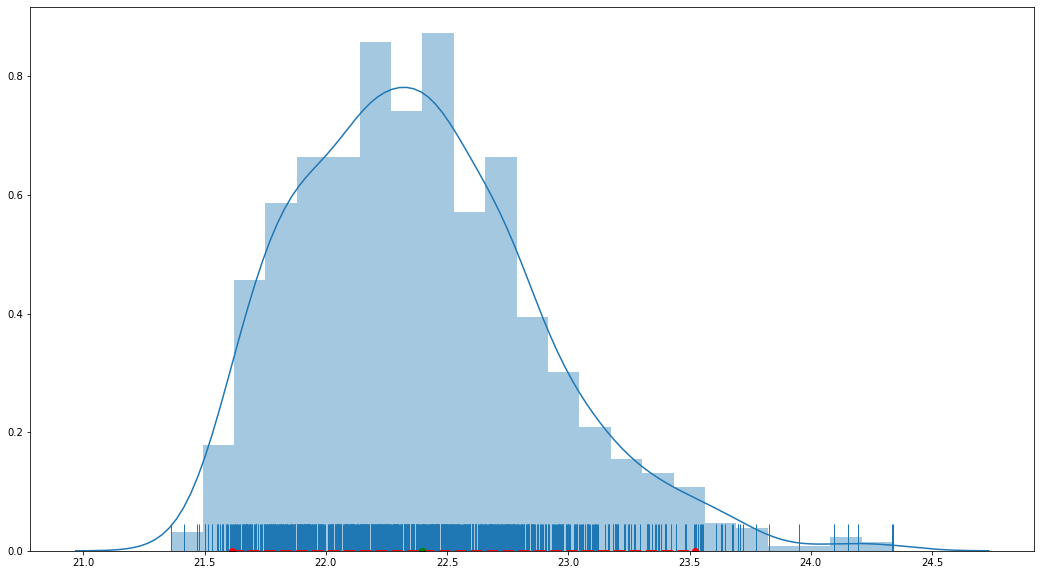

In [54]:
fig, ax = plt.subplots(figsize=(18,10)) # figsize in inches
sns.distplot(df_means, rug=True)
#sns.boxplot(data=df_means, orient="h", notch=True)

#wierd
x1 = [lower_interval, upper_interval]
x2 = [0.0, 0.0]    

ax.plot(x1, x2, 'red', linestyle='--', marker='o', lw=3)


y1 = [amount_spent.mean().iloc[0], amount_spent.mean().iloc[0]]
y2 = [0.0, 0.0]


ax.plot(y1, y2, 'green', linestyle='--', marker='o', lw=3)

How many means are within the confidence interval?

In [55]:
df_means['isInInterval'] = df_means['amount_spent'].apply(lambda x : x >= lower_interval and x <= upper_interval)

In [56]:
df_means

,amount_spent,isInInterval
0,22.772775,True
1,22.635625,True
2,22.192098,True
3,22.112872,True
4,22.023885,True
5,22.464877,True
6,22.434514,True
7,22.249126,True
8,21.896252,True
9,22.696934,True


In [57]:
(sum(df_means['isInInterval']) / len(df_means))*100

95.0

In [58]:
def amount(param):
    if param <=21:
        return 'less'
    elif param >21 and param <=23:
        return 'adequate'
    elif param >23:
        return 'more'
    
df_new['money_spent'] = df_new['amount_spent'].apply(amount)

In [59]:
df_new

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country,money_spent
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom,less
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom,less
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom,adequate
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom,less
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom,less
5,536365,2010-12-01 08:26:00,201012,12,3,8,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,15.30,17850.0,United Kingdom,less
6,536365,2010-12-01 08:26:00,201012,12,3,8,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,25.50,17850.0,United Kingdom,more
7,536366,2010-12-01 08:28:00,201012,12,3,8,22633,HAND WARMER UNION JACK,6,1.85,11.10,17850.0,United Kingdom,less
8,536366,2010-12-01 08:28:00,201012,12,3,8,22632,HAND WARMER RED POLKA DOT,6,1.85,11.10,17850.0,United Kingdom,less
9,536367,2010-12-01 08:34:00,201012,12,3,8,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,54.08,13047.0,United Kingdom,more


In [61]:
df1=df_new[['amount_spent','money_spent']]
df1.head()

,amount_spent,money_spent
0,15.30,less
1,20.34,less
2,22.00,adequate
3,20.34,less
4,20.34,less


In [89]:
df_spent=df_new['amount_spent']
mean,std=df_spent.mean(),df_spent.std()
mean, std

(22.39474850474768, 309.05558838012377)

In [110]:
print("Skewness: %f" % df_new['amount_spent'].skew())

Skewness: 451.465538


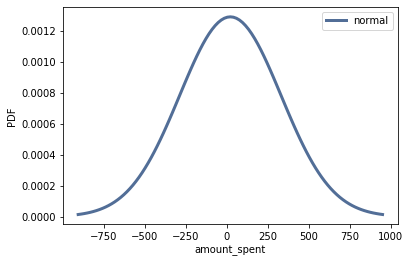

In [90]:
pdf = thinkstats2.NormalPdf(mean, std)
thinkplot.Pdf(pdf, label='normal')
thinkplot.Config(xlabel='amount_spent', ylabel='PDF')

In [91]:
pmf = pdf.MakePmf()

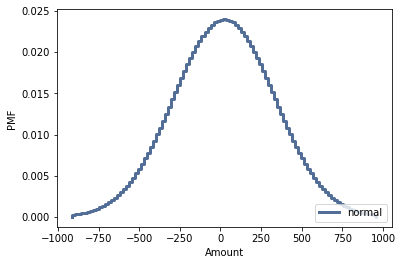

In [96]:
thinkplot.Pmf(pmf, label='normal')
thinkplot.Config(xlabel='Amount', ylabel='PMF')

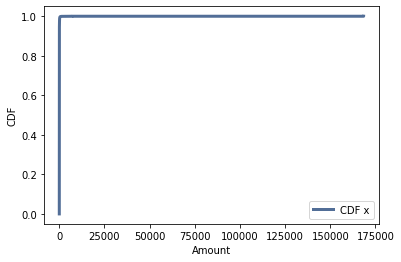

In [97]:
cdf = thinkstats2.Cdf(df_spent, label='CDF x')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Amount', ylabel='CDF', loc='lower right')

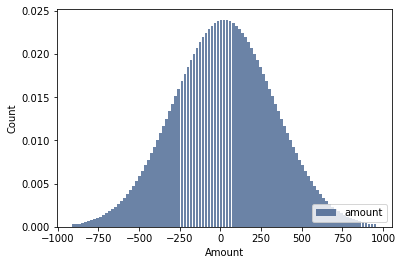

In [109]:
hist = thinkstats2.Hist(pmf, label='amount')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Amount', ylabeal='Count')

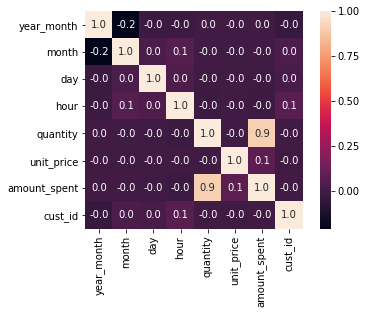

In [101]:
sns.heatmap(df_new.corr(),square=True,annot=True,fmt='.1f')

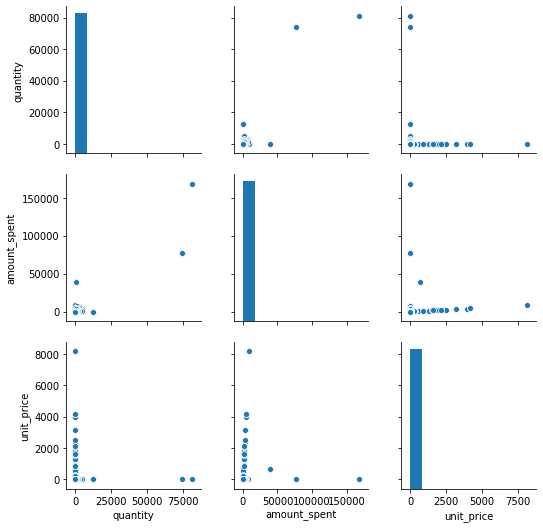

In [103]:
sns.pairplot(data=df_new[['quantity', 'amount_spent', 'unit_price']])